In [10]:
import pandas as pd
import numpy as np

# 1. Load the data

In [11]:
orders_df = pd.read_csv('Orders.csv')
products_df = pd.read_csv('products.csv')

In [12]:
sales_df = orders_df.merge(products_df, on='product_id')

# 2. Data Cleaning

In [13]:
sales_df.dropna(inplace=True)
sales_df.drop_duplicates(inplace=True)
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])

# 3. NumPy Operations

In [14]:
sales_df['total_revenue']  = np.multiply(sales_df['quantity'], sales_df['price'])

# 4. Data Transformation

In [15]:
sales_df['year'] = sales_df['order_date'].dt.year   
sales_df['month'] = sales_df['order_date'].dt.month  

<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='year,month'>

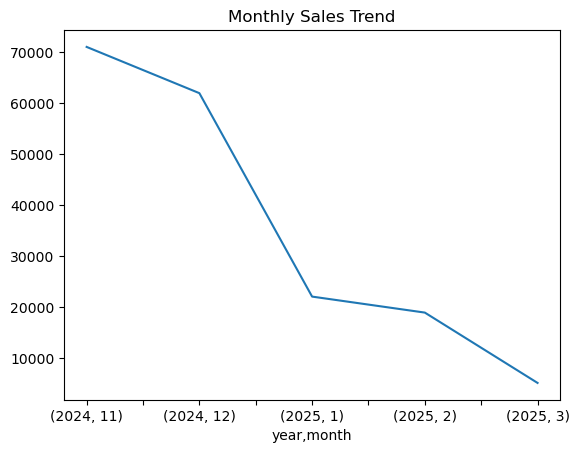

In [16]:
monthly_sales = sales_df.groupby(['year', 'month'])['total_revenue'].sum()
monthly_sales.plot(kind='line', title='Monthly Sales Trend')

In [17]:
import psycopg2 as pg
from dotenv import load_dotenv
import os
load_dotenv('.env.local') #Load environmental variables

True

# Connect to Database

In [18]:
connectionString = os.getenv('POSTGRESQL_CRED')
connection = pg.connect(connectionString)
cursor = connection.cursor()

# Create Schema and Table

In [19]:
cursor.execute(''' 
CREATE SCHEMA IF NOT EXISTS sales;
''')
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales.sales (
    order_id INT,
    customer_id INT,
    order_date DATE,
    product_id INT,
    quantity INT,
    product_name VARCHAR(50),
    category VARCHAR(50),
    price FLOAT,
    total_revenue FLOAT,
    year INT,
    month INT
);
''')

# Insert the data

In [20]:
for index, row in sales_df.iterrows():
    cursor.execute('''
    INSERT INTO sales.sales (order_id, customer_id, order_date, product_id, quantity, product_name, category, price, total_revenue, year, month)
    VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);
    ''', (row['order_id'], row['Cutomer_id'], row['order_date'], row['product_id'], row['quantity'], row['product_name'], row['category'], row['price'], row['total_revenue'], row['year'], row['month']))

connection.commit()

# Reusable Function to view tables

In [21]:
def view_table(table_name, limit):
    query = f"SELECT * FROM {table_name}"
    if limit:
        query += f" LIMIT {limit}"
    return pd.read_sql_query(query, connection)

In [22]:
print(view_table('sales.sales', 10))

   order_id  customer_id  order_date  product_id  quantity product_name  \
0         1           20  2024-11-01           3         2       Tablet   
1         2           36  2024-11-01           1         1       Laptop   
2         3            1  2024-11-01           8         3   Headphones   
3         4           36  2024-11-02           6         1   Smartwatch   
4         5           14  2024-11-02          12         2         Desk   
5         6            8  2024-11-02          25         4         Oven   
6         7           18  2024-11-03          19         1    Microwave   
7         8           47  2024-11-03          15         1         Sofa   
8         9           22  2024-11-03          33         3        Juice   
9        10            8  2024-11-04           7         2       Camera   

          category   price  total_revenue  year  month  
0      Electronics   450.0          900.0  2024     11  
1      Electronics  1200.0         1200.0  2024     11  
2  

C:\Users\MarzukSanniEntsie\AppData\Local\Temp\ipykernel_20804\4181638582.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  return pd.read_sql_query(query, connection)


In [23]:
connection.close()